Install prerequisites and import appropriate functions

In [70]:
%pip install pandas matplotlib scikit-learn
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Read input CSV from the folder and print it to confirm successful read

In [71]:
df_pm = pd.read_csv('17-3-2023  -  13-49.csv',delimiter=',',header='infer')

In [72]:
df_pm

,DateTime,Fidas 200 PM2.5,SPS30 PM2.5,SEN55 PM2.5,HPMA115 PM2.5,NextPM PM2.5,SDS011 PM2.5
0,2023-3-17 13:50:0,0,3.18,1.5,0,0.0,0
1,2023-3-17 13:50:5,0,2.90,1.7,0,0.0,0
2,2023-3-17 13:50:10,0,2.91,1.8,0,2.8,0
3,2023-3-17 13:50:15,0,2.89,1.8,0,2.6,0
4,2023-3-17 13:50:20,0,2.70,1.9,0,4.3,0
...,...,...,...,...,...,...,...
65583,2023-3-21 9:30:20,0,1.02,0.8,0,2.6,0
65584,2023-3-21 9:30:25,0,0.96,0.9,0,4.5,0
65585,2023-3-21 9:30:30,0,0.99,0.9,0,3.1,0
65586,2023-3-21 9:30:35,0,1.11,1.0,0,1.7,0


Remove labels for not deployed sensors, convert the datetime characteristic into a pandas datetime characteristic

In [73]:
df_pm = df_pm.drop(['Fidas 200 PM2.5','HPMA115 PM2.5','SDS011 PM2.5'], axis=1)
df_pm
df_pm['DateTime'] = pd.to_datetime(df_pm.DateTime)
df_pm

,DateTime,SPS30 PM2.5,SEN55 PM2.5,NextPM PM2.5
0,2023-03-17 13:50:00,3.18,1.5,0.0
1,2023-03-17 13:50:05,2.90,1.7,0.0
2,2023-03-17 13:50:10,2.91,1.8,2.8
3,2023-03-17 13:50:15,2.89,1.8,2.6
4,2023-03-17 13:50:20,2.70,1.9,4.3
...,...,...,...,...
65583,2023-03-21 09:30:20,1.02,0.8,2.6
65584,2023-03-21 09:30:25,0.96,0.9,4.5
65585,2023-03-21 09:30:30,0.99,0.9,3.1
65586,2023-03-21 09:30:35,1.11,1.0,1.7


Plot the two mass concentrations alongside each other, add labels and legends

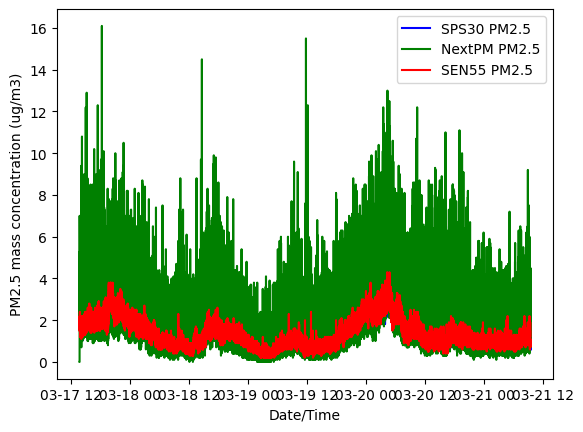

In [74]:
plt.plot(df_pm['DateTime'], df_pm['SPS30 PM2.5'], 'b-', df_pm['DateTime'], df_pm['NextPM PM2.5'], 'g-', df_pm['DateTime'], df_pm['SEN55 PM2.5'], 'r-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SPS30 PM2.5', 'NextPM PM2.5', 'SEN55 PM2.5'])
plt.show()

Calculate and print RMSE

In [75]:
rmse = mean_squared_error(df_pm['SPS30 PM2.5'], df_pm['NextPM PM2.5'], squared = False )
rmse

1.4482466434434318

Run moving average of NextPM dataset to try and improve data quality and plot against original data

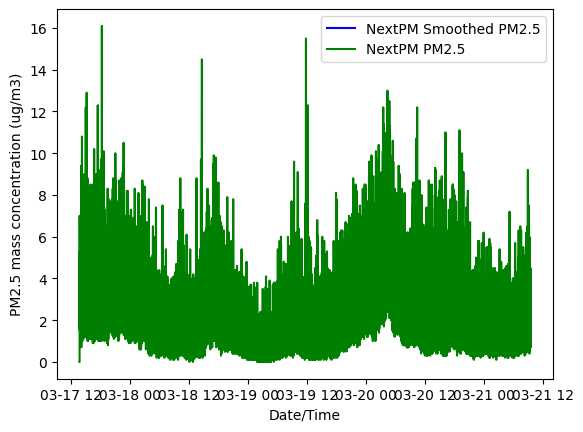

In [76]:
df_pm['NextPM Smoothed PM2.5'] = df_pm['NextPM PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['NextPM Smoothed PM2.5'], 'b-', df_pm['DateTime'], df_pm['NextPM PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['NextPM Smoothed PM2.5', 'NextPM PM2.5'])
plt.show()

Run moving average of SEN55 datasets to try and improve data quality and plot against original data

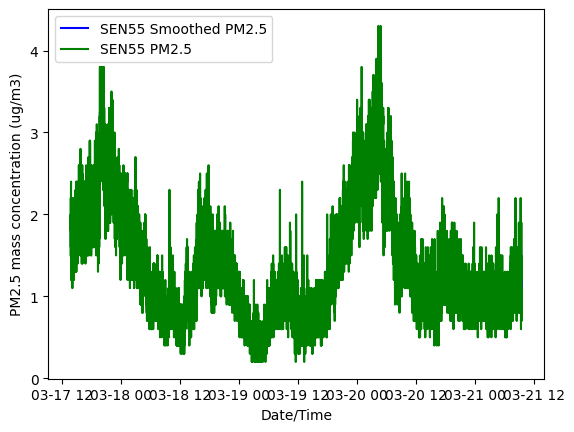

In [77]:
df_pm['SEN55 Smoothed PM2.5'] = df_pm['SEN55 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['SEN55 Smoothed PM2.5'], 'b-', df_pm['DateTime'], df_pm['SEN55 PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SEN55 Smoothed PM2.5', 'SEN55 PM2.5'])
plt.show()

Run moving average of SPS30 dataset to try and improve data quality and plot against original data

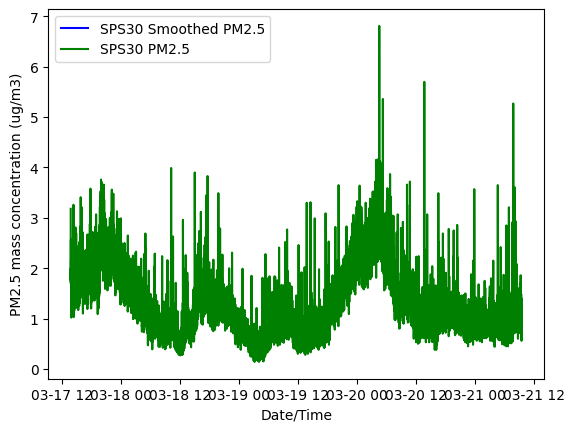

In [78]:
df_pm['SPS30 Smoothed PM2.5'] = df_pm['SPS30 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['SPS30 Smoothed PM2.5'], 'b-', df_pm['DateTime'], df_pm['SPS30 PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SPS30 Smoothed PM2.5', 'SPS30 PM2.5'])
plt.show()

Plot smoothed SPS30 and NextPM readings against each other

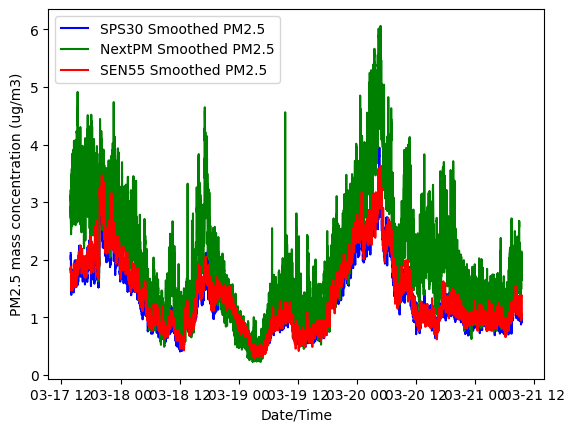

In [79]:
plt.plot(df_pm['DateTime'], df_pm['SPS30 Smoothed PM2.5'], 'b-', df_pm['DateTime'], df_pm['NextPM Smoothed PM2.5'], 'g-', df_pm['DateTime'], df_pm['SEN55 Smoothed PM2.5'], 'r-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SPS30 Smoothed PM2.5', 'NextPM Smoothed PM2.5', 'SEN55 Smoothed PM2.5'])
plt.show()

In [80]:
rmse2 = mean_squared_error(df_pm.dropna(axis=0, how='any')['SPS30 Smoothed PM2.5'], df_pm.dropna(axis=0, how='any')['NextPM Smoothed PM2.5'], squared = False )
rmse2

0.8846881451335072

Evaluate pearson correlation and Coefficient of determination for all sensors

In [81]:
SPS30NextPMR2 = r2_score(df_pm.dropna(axis=0, how='any')['SPS30 Smoothed PM2.5'], df_pm.dropna(axis=0, how='any')['NextPM Smoothed PM2.5'])
SEN55NextPMR2 = r2_score(df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'], df_pm.dropna(axis=0, how='any')['NextPM Smoothed PM2.5'])
SEN55SPS30R2 = r2_score(df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'], df_pm.dropna(axis=0, how='any')['SPS30 Smoothed PM2.5'])

print('SPS30 NextPM R2 = ', SPS30NextPMR2)
print('SEN55 NextPM R2 = ', SEN55NextPMR2)
print('SEN55 SPS30 R2 = ', SEN55SPS30R2)

SPS30NextPMr = df_pm.dropna(axis=0, how='any')['SPS30 Smoothed PM2.5'].corr(df_pm.dropna(axis=0, how='any')['NextPM Smoothed PM2.5'])
SEN55NextPMr = df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'].corr(df_pm.dropna(axis=0, how='any')['NextPM Smoothed PM2.5'])
SEN55SPS30r = df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'].corr(df_pm.dropna(axis=0, how='any')['SPS30 Smoothed PM2.5'])

print('SPS30 NextPM r = ', SPS30NextPMr)
print('SEN55 NextPM r = ', SEN55NextPMr)
print('SEN55 SPS30 r = ', SEN55SPS30r)

SPS30 NextPM R2 =  -1.1578485031106145
SEN55 NextPM R2 =  -0.7067123790378249
SEN55 SPS30 R2 =  0.9359032664769354
SPS30 NextPM r =  0.8808843420959738
SEN55 NextPM r =  0.8729728481212984
SEN55 SPS30 r =  0.973464509822061
